In [40]:
import arviz as az
import numpy as np
import pymc as pm

from matplotlib import pylab as plt
from scipy import stats

In [41]:
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)

%config InlineBackend.figure_format = 'retina'
%load_ext watermark
az.style.use("arviz-darkgrid")

# Statistical Rethinking

# Chapter 2 - SMALL WORLDS AND LARGE WORLDS


### End of chapter problems

### 2E1.

Which of the expressions below correspond to the statement: $\textit{the probability of rain on Monday?}$

#### Answer 
 

   (2) $Pr(rain|Monday)$

### 2E2.

Which of the following statements corresponds to the expression: Pr(Monday|rain)?

#### Answer 


   (3)  The probability that it is Monday, given that it is raining.

### 2E3.

Which of the expressions below correspond to the statement: the probability that it is Monday,
given that it is raining?

#### Answer 


   (1) $Pr(Monday|rain)$ & (3) $\frac{Pr(rain|Monday)Pr(Monday)}{Pr(rain)}$

### 2E4.

The Bayesian statistician Bruno de Finetti (1906–1985) began his 1973 book on probability theory with the declaration: “PROBABILITY DOES NOT EXIST.” The capitals appeared in the original,
so I imagine de Finetti wanted us to shout this statement. What he meant is that probability is a device for describing uncertainty from the perspective of an observer with limited knowledge; it has no
objective reality. Discuss the globe tossing example from the chapter, in light of this statement. What
does it mean to say “the probability of water is 0.7”?

#### Answer 


To say that the probability of something is p=x, is to state our belief about the situation, not to claim that it is objectively the case. So saying the Earth has probability 0.7 that any randomly sampled point on its surface will be water is something akin to revealing you believe that around 0.7 of the Earth's surface is covered, but your belief could change in light of new data that you receive upon further sampling

### 2M1.

Recall the globe tossing model from the chapter. Compute and plot the grid approximate
posterior distribution for each of the following sets of observations. In each case, assume a uniform
prior for p.

(1) W, W, W

(2) W, W, W, L

(3) L, W, W, L, W, W, W

In [14]:
p_to_sample = np.linspace(0, 1, 100)

In [31]:
def get_posterior(prior_func, likelihood_func, param_to_sample, *observed_args):
    prior_grid = prior_func(param_to_sample)
    likelihood_grid = likelihood_func(param_to_sample, *observed_args)
    
    posterior = prior_grid * likelihood_grid
    posterior = posterior / posterior.sum()
    return posterior

In [84]:
def uniform_prior(param_grid):
    return np.repeat(1, len(param_grid))

def binomial_likelihood(p_to_sample, successes, tosses):
    return stats.binom.pmf(successes, tosses, p_to_sample)

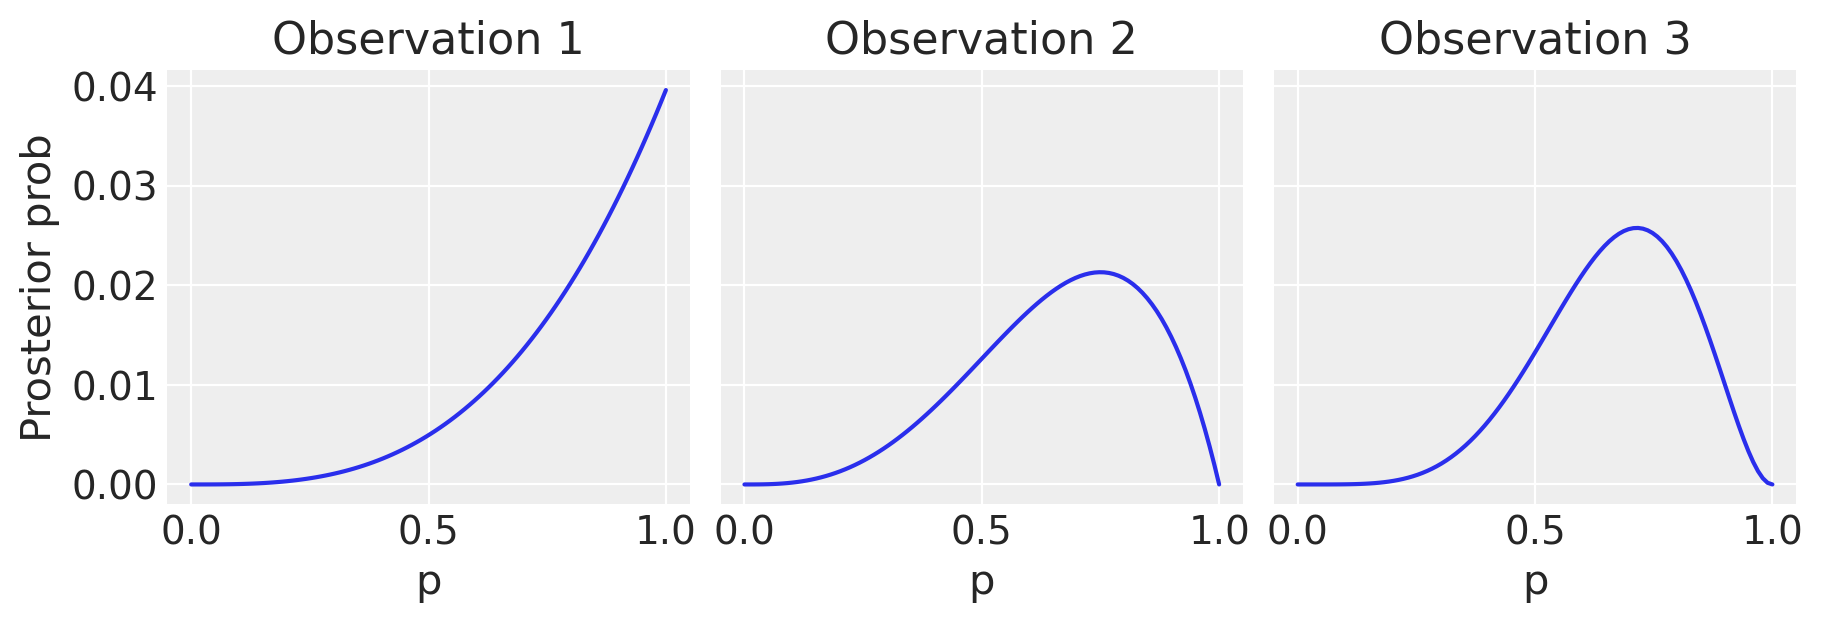

In [85]:
outcomes = [(3, 3), (3, 4), (5, 7)]

fig, ax = plt.subplots(ncols=len(outcomes), sharey=True, figsize=(9, 3))
ax[0].set_ylabel("Prosterior prob")
for c, (w, t) in enumerate(outcomes):
    my_posterior = get_posterior(uniform_prior, binomial_likelihood, p_to_sample, w, t)
    ax[c].plot(p_to_sample, my_posterior)
    ax[c].set_title("Observation " + str(c + 1))
    ax[c].set_xlabel("p")

now

pymc

just for fun

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.


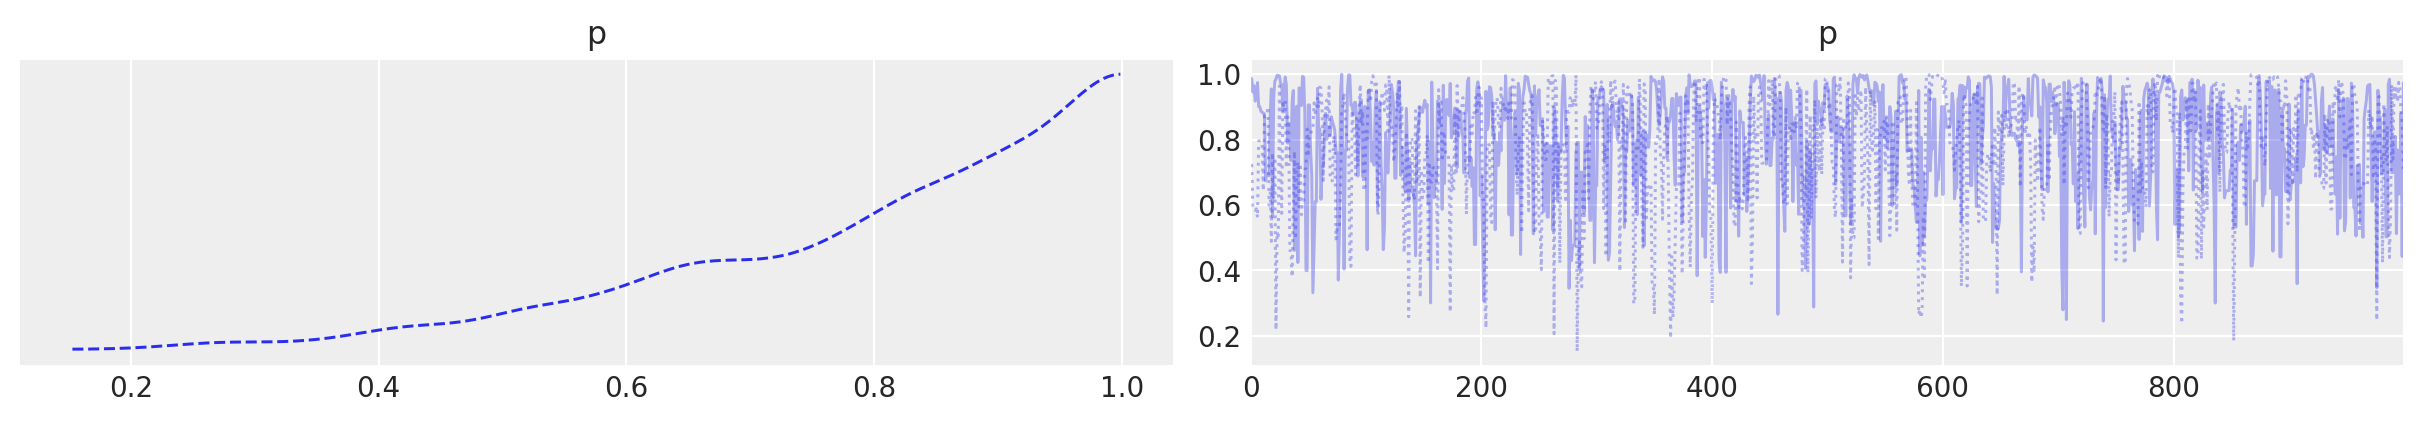

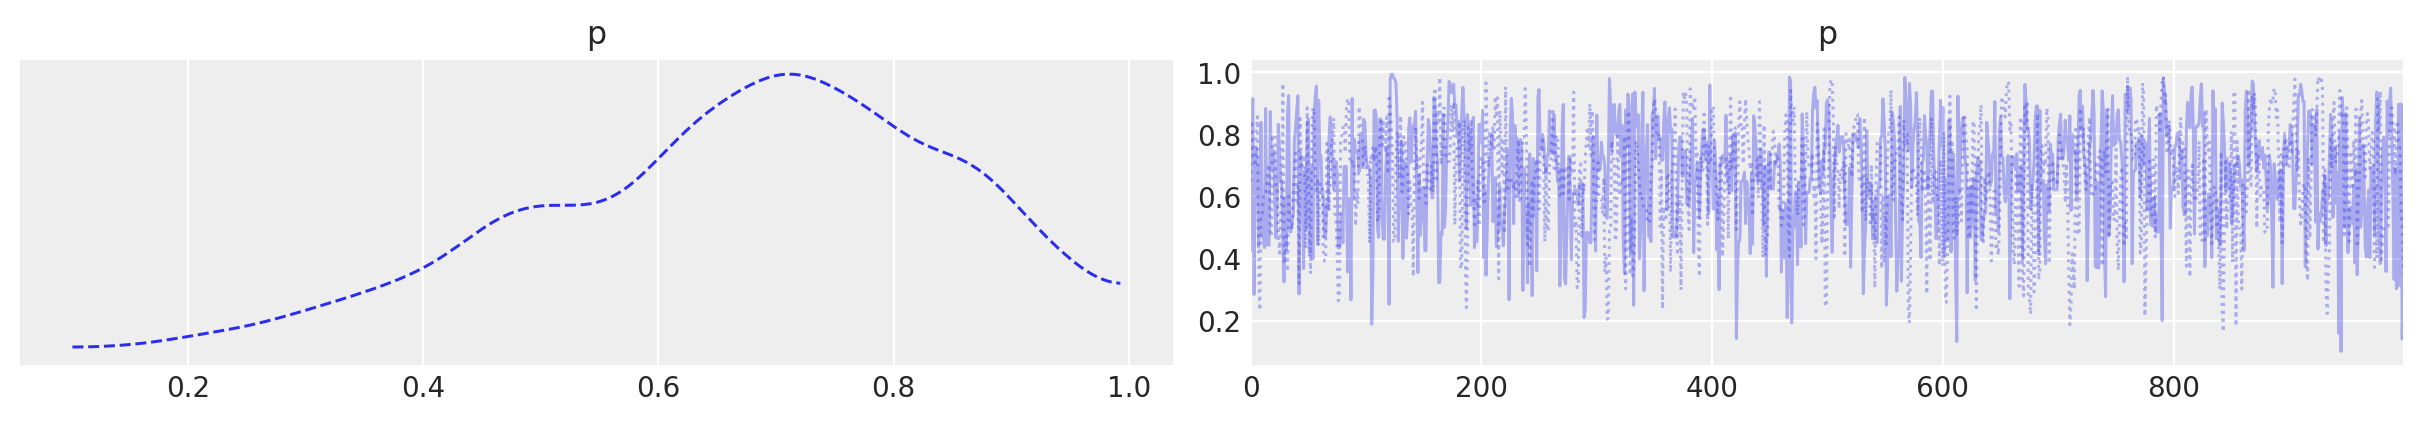

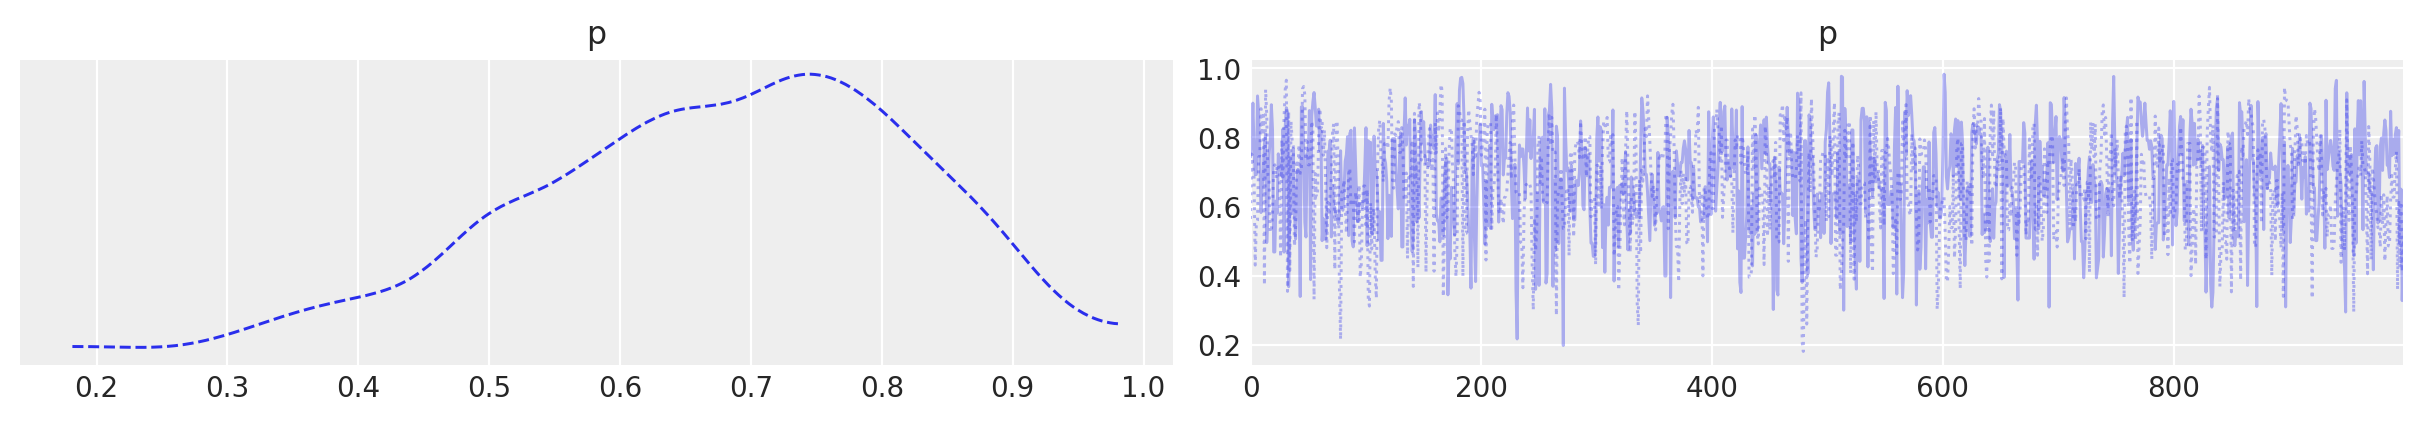

In [61]:
for w, t in outcomes:
    with pm.Model() as grid_approx:
        prior = pm.Uniform("p", 0, 1)
        likelihood = pm.Binomial("y", n=t, p=prior, observed=w)
        idata = pm.sample(chains=2, cores=1)

    az.plot_trace(idata, combined=True);

now

back to our regularly scheduled programming

### 2M2.

Now assume a prior for p that is equal to zero when p < 0.5 and is a positive constant when
p ≥ 0.5. Again compute and plot the grid approximate posterior distribution for each of the sets of
observations in the problem just above.

To do this I'll just recycle the code I used above, but I'll modify the prior from being the uniform distribution to become the Heaviside function $\theta(x-0.5)$

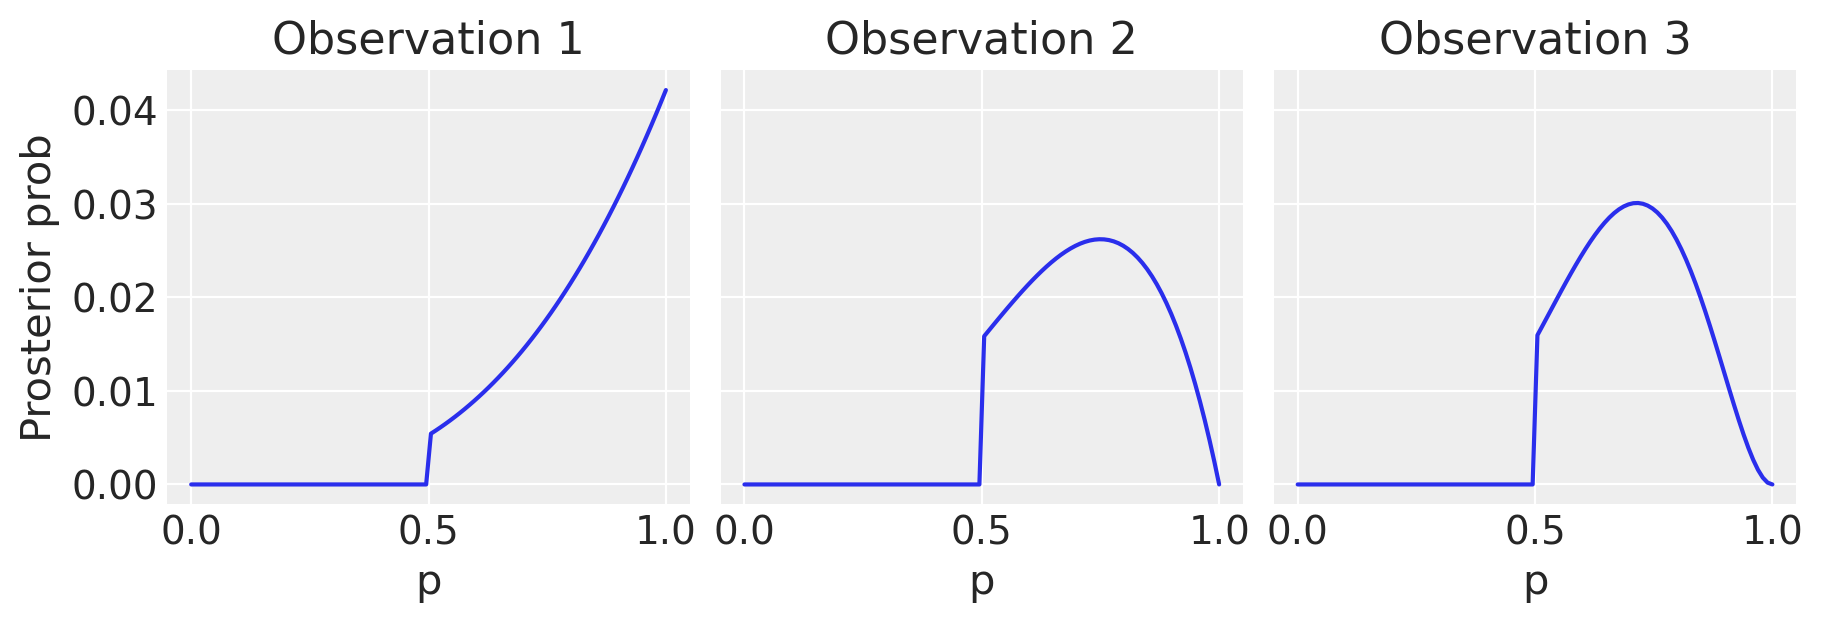

In [87]:
def heaviside_prior(param_grid):
    return uniform_prior(param_grid) * param_grid > 0.5

fig, ax = plt.subplots(ncols=len(outcomes), sharey=True, figsize=(9, 3))
ax[0].set_ylabel("Prosterior prob")
for c, (w, t) in enumerate(outcomes):
    my_posterior = get_posterior(heaviside_prior, binomial_likelihood, p_to_sample, w, t)
    ax[c].plot(p_to_sample, my_posterior)
    ax[c].set_title("Observation " + str(c + 1))
    ax[c].set_xlabel("p")

### 2M3.

Suppose there are two globes, one for Earth and one for Mars. The Earth globe is 70% covered
in water. The Mars globe is 100% land. Further suppose that one of these globes—you don’t know
which—was tossed in the air and produced a “land” observation. Assume that each globe was equally
likely to be tossed. Show that the posterior probability that the globe was the Earth, conditional on
seeing “land” (Pr(Earth|land)), is 0.23.

#### Answer 


P(g=e | t=land) = P(g=e) * P(t=land | g=e) / P(g=land)

need to expand P(g=land)

P(g=e | t=land) = P(g=e) * P(t=land | g=e) / (P(g=land|t=E)P(E) + P(g=land|t=M)P(M))

In [94]:
p_e_g_l = 0.5 * 0.3 / (0.3 * 0.5 + 0.5)

In [95]:
p_e_g_l

0.23076923076923075

2M4. Suppose you have a deck with only three cards. Each card has two sides, and each side is either
black or white. One card has two black sides. The second card has one black and one white side. The
third card has two white sides. Now suppose all three cards are placed in a bag and shuffled. Someone
reaches into the bag and pulls out a card and places it flat on a table. A black side is shown facing up,?
but you don’t know the color of the side facing down. Show that the probability that the other side is
also black is 2/3. Use the counting method (Section 2 of the chapter) to approach this problem. This
means counting up the ways that each card could produce the observed data (a black side facing up
on the table).

could be either side of the black card (2 black left) or the b/w card (1 w left), so 2/(2+1)

2M5. Now suppose there are four cards: B/B, B/W, W/W, and another B/B. Again suppose a card is
drawn from the bag and a black side appears face up. Again calculate the probability that the other
side is black.

### 2M6.

Imagine that black ink is heavy, and so cards with black sides are heavier than cards with white
sides. As a result, it’s less likely that a card with black sides is pulled from the bag. So again assume
there are three cards: B/B, B/W, and W/W. After experimenting a number of times, you conclude that
for every way to pull the B/B card from the bag, there are 2 ways to pull the B/W card and 3 ways to
pull the W/W card. Again suppose that a card is pulled and a black side appears face up. Show that
the probability the other side is black is now 0.5. Use the counting method, as before.

#### Answer 



To make this clearer, this is equivalent to setting a new prior distribution on the set of cards that you have. They are as follows.

$Pr(B/B) = \frac{1}{1+2+3}$

$Pr(B/W) = \frac{2}{1+2+3}$

$Pr(W/W) = \frac{3}{1+2+3}$

Then we can see that this implies the following

$Pr(B) = Pr(B|B/B)Pr(B/B) + Pr(B|B/W)Pr(B/W) + Pr(B|W/W)Pr(W/W) = 1 \times 1/6 + 1/2 \times 2/6 + 0 \times1/2 = 1/3$

Giving the final result to be

$Pr(DB|B) = \frac{Pr(B|DB)Pr(DB)}{Pr(B)} =  \frac{1 \times 1/6}{1/3} = 1/2$

QED

### 2M7.
Assume again the original card problem, with a single card showing a black side face up. Before
looking at the other side, we draw another card from the bag and lay it face up on the table. The face
that is shown on the new card is white. Show that the probability that the first card, the one showing
a black side, has black on its other side is now 0.75. Use the counting method, if you can. Hint: Treat
this like the sequence of globe tosses, counting all the ways to see each observation, for each possible
first card.

#### Answer 


In [ ]:
below are all the possibile paths to draw one black and one white card
yes means the black card had black on the other side
no means it didn't
the requested probability is equivalent to the number of yes paths divided by all the yes and no paths listed

b/b, b/w, w/w
     |
b/b,  /w, w/w
          |
no=1

b/b, b/w, w/w
     |
b/b,  /w, w/w
            |
no=2

b/b, b/w, w/w
  |
b/ , b/w, w/w
       |
yes=1

b/b, b/w, w/w
  |
b/ , b/w, w/w
          |
yes=2

b/b, b/w, w/w
  |
b/ , b/w, w/w
            |
yes=3

b/b, b/w, w/w
|
 /b,  /w, w/w
       |
yes=4

b/b, b/w, w/w
|
 /b,  /w, w/w
          |
yes=5

b/b, b/w, w/w
|
 /b,  /w, w/w
            |
yes=6

...
so yes / (yes + no) = 6 / (6 + 2) = .75

### 2H1.

Suppose there are two species of panda bear. Both are equally common in the wild and live
in the same places. They look exactly alike and eat the same food, and there is yet no genetic assay
capable of telling them apart. They differ however in their family sizes. Species A gives birth to twins
10% of the time, otherwise birthing a single infant. Species B births twins 20% of the time, otherwise
birthing singleton infants. Assume these numbers are known with certainty, from many years of field
research.
Now suppose you are managing a captive panda breeding program. You have a new female panda
of unknown species, and she has just given birth to twins. What is the probability that her next birth
will also be twins?

#### Answer 


In [ ]:
p(twins_next) = p(b|twins) * 0.2 + (1 - p(b|twins)) * 0.1

NEED TO FIRST SOLVE FOR
p(b|twins) = p(twins|b) * p(b) / p(twins)

p(twins|b) = 0.2
p(b) = 0.5
p(twins) = 0.15

SO
p(b|twins) = 0.2 * 0.5 / 0.15 = 2/3

NOW
p(twins_next) = 2/3 * 0.2 + (1/3) * 0.1 = (0.4 + 0.1) / 3 = 1/6

### 2H3.

Continuing on from the previous problem, suppose the same panda mother has a second birth
and that it is not twins, but a singleton infant. Compute the posterior probability that this panda is
species A

#### Answer 


In [ ]:
NEED TO FIRST SOLVE FOR
p(a|single,twin) = p(single, twin | a) * p(a) / p(single, twin)

p(single, twin | a) = p(single | a) * p(twin | a) = 0.9*0.1
p(a) = p(b) = 0.5
p(single, twin) = p(single, twin | a) * p(a) + p(single, twin | b) * p(b)

p(a|single, twin) = 0.09 / (0.9 * 0.1 + 0.8 * 0.2)

In [102]:
0.09 / (0.9 * 0.1 + 0.8 * 0.2)

0.35999999999999993

### 2H4.
A common boast of Bayesian statisticians is that Bayesian inference makes it easy to use all of
the data, even if the data are of different types.
So suppose now that a veterinarian comes along who has a new genetic test that she claims can
identify the species of our mother panda. But the test, like all tests, is imperfect. This is the information you have about the test:
• The probability it correctly identifies a species A panda is 0.8.
• The probability it correctly identifies a species B panda is 0.65.
The vet administers the test to your panda and tells you that the test is positive for species A. First
ignore your previous information from the births and compute the posterior probability that your
panda is species A. Then redo your calculation, now using the birth data as well.

#### Answer 


In [ ]:
First part of the answer:

those probabilities are recall!

# recalls
p(t=a|a) = 0.8; p(t=b|a) = 0.2; p(t=a|b) = 0.35; p(t=b|b) = 0.65

# priors
p(a) = p(b) = 0.5

p(a|t=a) = p(t=a|a) * p(a) / p(t=a)
p(a|t=a) = p(t=a|a) * p(a) / (p(t=a|a) * p(a) + p(t=a|b) * p(b))
p(a|t=a) = .8 / (.8 + .35)

In [8]:
.8 / (.8 + .35)

0.6956521739130436

In [ ]:
Second part of the answer:

method 1: update the prior p(a) and p(b) for

p(a|single,twin) = p(single, twin | a) * p(a) / p(single, twin)
p(single, twin) = p(single, twin | a) * p(a) + p(single, twin | b) * p(b)

p(a|single, twin) = 0.09 * 0.69565 / (0.9 * 0.1 * .69565 + 0.8 * 0.2 * (1 - .69565))

In [24]:
0.09 * 0.6956521739130436 / (0.9 * 0.1 * 0.6956521739130436 + 0.8 * 0.2 * (1 - 0.6956521739130436))

0.5625

In [ ]:
method 2: update the prior p(a) and p(b) for

p(a|t=a) = p(t=a|a) * p(a) / p(t=a)
p(a|t=a) = p(t=a|a) * p(a) / (p(t=a|a) * p(a) + p(t=a|b) * p(b))

p(a|t=a) = .8 * .36/ (.8*.36 + .35*.64)

In [25]:
.8 * .36/ (.8*.36 + .35*.64)

0.5625

In [ ]:
method 3: leave prior the same but solve for p(a|t=a, single, twin)

p(a|t=a, single, twin) = p(t=a, single, twin | a) * p(a) / p(t=a, single, twin)
= p(t=a | a) * p(single | a) * p(twin | a) * p(a) / p(t=a, single, twin)
p(t=a, single, twin) = p(t=a, single, twin | a) * p(a) + p(t=a, single, twin | b) * p(b)

In [23]:
.8 * .9 * .1 / (.8*.9*.1 + .35*.8*.2)

0.5625